# Tema 16: Descriptivos básicos

En libretas anteriores ya vimos que los `datasets` en `pandas` tiene un método llamado `describe` que puede generar algunos estadísticos claves para comenzar a describir los datos, pero hoy iremos más profundo en cómo analizarlos. En esta libreta usaremos una librería nueva `matplotlib` para comenzar a elaborar gráficos exploratorios. 

:::{note}
Aunque utilizamos `matplotlib` en esta libreta vamos a dejar que pandas se encargue de los gráficos, en otras lecciones veremos cómo usar matplotlib de forma más directa.
:::

## Cargar las librerías

:::{tip}
Recuerda que cada celda que se ejecuta deposita sus valores en la memoria del kernel de python que estamos utilizando.
Eso quiere decir que podemos importar las librerías en una sola celda para organizar nuestro código.
Comenzaremos cargando todo lo necesario desde el principio.
:::

:::{important}
En python las importaciones pueden ser procesos tardados, como lo verás en esta libreta, pero python importa librerías una sola vez. Esto quiere decir, que si tienes dos importaciones de lo mismo, python no volverá a importar la librería.

```python
import pandas as pd # aquí python importa la libería
import pandas as pd # aquí python prácticamente se salta la línea
```
:::

Ejecuta la siguiente celda.

In [1]:
# nota que a todas les cambiamos el nombre
# esto es estándar en el análisis de datos
import pandas as pd
import matplotlib.pyplot as plt
print('Importaciones listas')

Importaciones listas


## Cargar los datos desde la url

Esto es igual que en la libreta previa, pero si hiciste el ejercicio final, intenta cambiar el código para importar la librería desde el archivo `csv`.

### Nota
Si tienes el archivo `csv` puedes cargarlo así.
```python
path = 'Documentos/cursos/pingüinos.csv' # ejemplo
df = pd.read_csv(path)
```



In [2]:
url = 'https://raw.githubusercontent.com/raphaelvallat/pingouin/refs/heads/main/src/pingouin/datasets/penguins.csv'

df = pd.read_csv(url)
df.head() # solo las primeras 5 filas

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


## Análisis descriptivo

Como debiste revisar en la libreta previa el dataset contiene tres especies diferentes de pingüinos, **Adelie**, **Chinstrap** y **Gentoo**; y contiene algunos datos de ellos, de qué isla provienen, las dimenciones de sus picos, aletas y su peso corporal, así como su sexo. Comenzaremos analizando los datos categóricos.

### Información del dataset
Comencemos analizando el dataset como un todo, qué columnas tiene, cuántas filas, datos faltantes, etcétera.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Podemos ver que tenemos siete columnas, tres variables categóricas y cuatro numéricas `float`. Además, podemos ver que tenemos información de 344 pingüinos, pero no tenemos todos los datos de cada uno, solo la columna de especie e isla están completas y en la columna de sexo nos faltan 11 datos.


### Descriptivos categóricos

#### Generales
Iniciemos utilizando el método `describe` con las variables categóricas, en el output the `info` aparecen como "object".

In [4]:
df.describe(include='object')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


De aquí podemos ver que en especie, tenemos las tres ya comentadas y que la más frecuente aparentemente es la **Adelie**, la mayoría de los pingüinos provienen de la isla **Biscoe** y hay en total tres islas, solo tenemos dos categorías en la variable `sex` y la más frecuente es "male".


#### Cuentas
Esta información es útil pero es limitada, nos gustaría poder ver, de cada variable, su cuenta de valores y su porcentaje relativo, como es habitual.
Comencemos por obtener la cuenta de cada variable, eso lo hacemos con el método `value_counts`

In [5]:
# iniciaremos por "especie"
especie = df['species']
especie.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Para "especie" tenemos entonces los 152 Adelie que ya `describe` nos había dato, pero ahora podemos ver la cuenta de las otras dos especies, parece que la más rara en este dataset es Chinstrap.

Este código está bien, epero habría que analizar las otras dos categóricas y eso multiplicaría nuestro código, así que podemos utilizar eficientemente un simple loop.

In [6]:
for variable in ['species', 'island', 'sex']: # hacemos un loop para ahorrar código
    print(df[variable].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
male      168
female    165
Name: count, dtype: int64


Como puedes ver en dos líneas de código obtuvimos los datos que nos interesaban.
Ahora, veamos cómo podemos calcular las frecuencias relativas.
La fórmula es muy básica 

$\text{frecuencia relativa} = \frac{n_{cat}}{n_{total}}$

In [7]:
cuenta = df['species'].value_counts() # obtenemos la cuenta
total = cuenta.sum() # suma todos los valores
relativos = cuenta / total # dividie cada cuenta entre el total
porcentaje = relativos * 100 # si lo queremos como porcentaje
pd.DataFrame({ # utilizamos un dataframe para que mejore el formato del output.
    'cuenta': cuenta,
    'p': relativos,
    '%': porcentaje
})

,cuenta,p,%
species,,,
Adelie,152,0.441860,44.186047
Gentoo,124,0.360465,36.046512
Chinstrap,68,0.197674,19.767442


observa lo fácil que podemos hacer todos los cálculos. Es como una calculadora.
#### Ejercicio
Calcula ahora tú las frecuencias relativas de las otras dos variables categóricas `island` y `sex`.

In [8]:
'tu código aquí'

'tu código aquí'

### Descriptivos numéricos
Veamos ahora cómo describir nuestros datos numéricos.
Iniciemos como en la libreta previa con `describe`.

#### Descriptivos básicos

In [9]:
df.describe() # por default solo muestra las numéricas
              # no es necesario especificarlo


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


La tabla está bien, pero seguro te parece raro el formato, generalmente estos gráficos se muestran al revés, con las varialbes en las filas y los descriptivos en las columnas.
"Voltear la tabla" en python, es tribial. El término técnico es `Trasponer` y se logra de la siguiente manera.

In [10]:
df.describe().T # solo usamos el atributo T.


,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


También puede ser que sean demasiados decimales y eso dificulte la lectura, nuevamente arreglarlo es tribial, redondearemos a 2 decimales.


In [11]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.92,5.46,32.1,39.22,44.45,48.5,59.6
bill_depth_mm,342.0,17.15,1.97,13.1,15.60,17.30,18.7,21.5
flipper_length_mm,342.0,200.92,14.06,172.0,190.00,197.00,213.0,231.0
body_mass_g,342.0,4201.75,801.95,2700.0,3550.00,4050.00,4750.0,6300.0


Otro de los principales descriptivos en variables numéricas son las correlaciones.
En pandas es igualmente tribial generar una matriz de correlación.

In [12]:
(
    df
    .select_dtypes(exclude='object') # excluimos a las variables categóricas
    .corr() # corremos la matriz de correlación
            # por default utilizará pearson
)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


:::{note}
El atributo `T` está disponible en cualquier arreglo de datos, no solo en los descriptivos.
Lo mismo para el método `round`.
:::

### Visualizaciones básicas

Para continuar nuestro análisis descriptivo básico, utilizaremos algunos gráficos comunes.
Para comenzar a visualizar nuestros datos utilizaremos `matplotlib`

:::{important}
Por favor tomate un momento para revisar la [documentación](https://matplotlib.org/stable/index.html) de matplotlib.
También revisa los [acordeones](#acordeones-target).
:::
#### Distribuciones

##### Histogramas
Los histogramas nos dan información de la frecuencia de cada valor posible de nuestras variables numéricas.
Exploremos el comportamiento del peso.
Es posible generar un histograma directamente de la columna de peso con `pandas` y el método `hist`.

<Axes: >

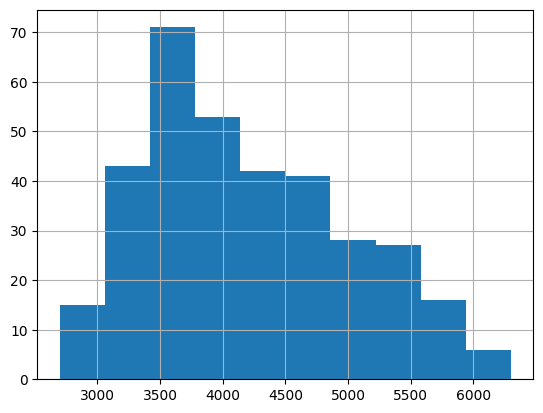

In [13]:
df['body_mass_g'].hist()

Si solo lo dejamos así, es poco informativo. En un momento veremos cómo darle más estilo a la imagen, pero antes, es importante resaltar algo notable que está sucediendo.
No es `pandas` quien acaba de hacer el histograma, en realidad fue `matplotlib`. 

Sí, `matplotlib` es la base de muchas librerías que ayudan con la visualización de los datos, incluyendo `pandas`.
Eso quiere decir que podemos utilizar `matplotlib` para interactuar más con la imagen, por ejemplo:

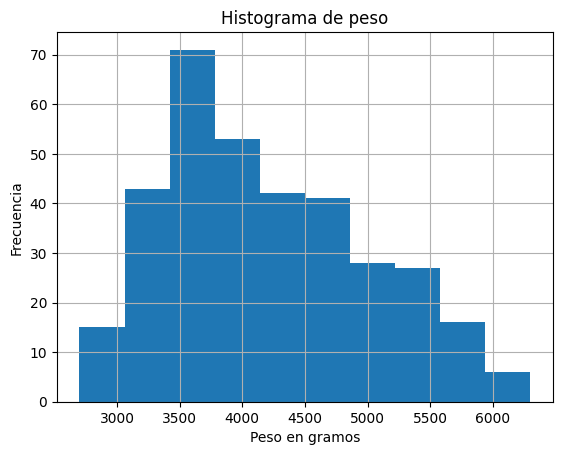

In [14]:
df['body_mass_g'].hist()
plt.title('Histograma de peso') # para el título
plt.xlabel('Peso en gramos')    # rótulo X
plt.ylabel('Frecuencia')        # rótulo Y
plt.show()                      # para el formato de salida de la imagen

###### Ejercicio
1. Revisa la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html) de `pd.Series.hist`.
2. Utiliza la documentación y los ejemplos para generar nuevas versiones del histograma.
3. Revisa también `pd.DataFrame.hist`



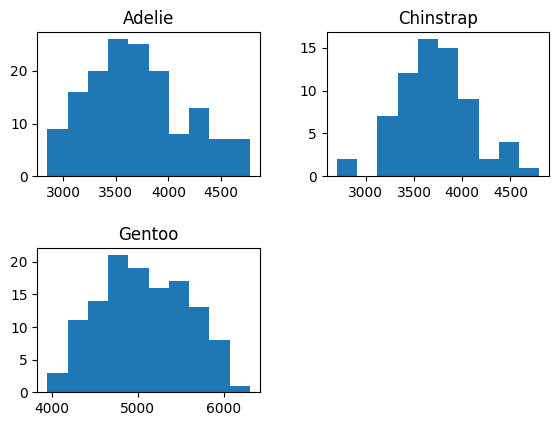

In [15]:
# ejemplo de lo que se puede hacer si utilizamos hist desde el dataframe en lugar de la serie.
df.hist(
    column='body_mass_g', # dato que va al histograma
    by='species',  # cómo separar los datos
    xrot=0
)
plt.show()

#### Densidad
Los gráficos de densidad son también muy útiles y frecuentemente utilizados para analizar la distribución de los datos.
El método estándar para analizar la densidad de datos empíricos es con el estimado del kernel, en inglés `kde`.

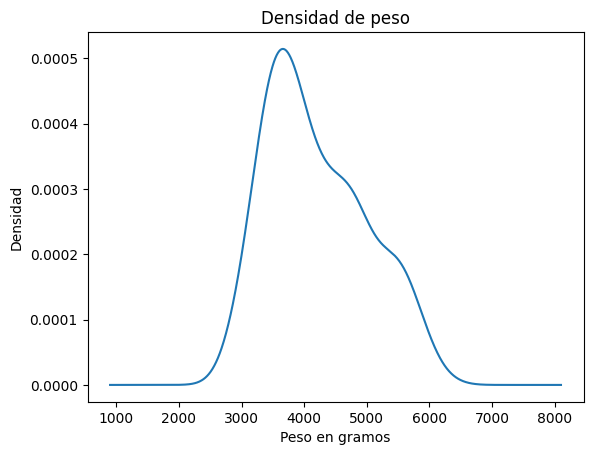

In [16]:
df['body_mass_g'].plot.kde()
plt.title('Densidad de peso')
plt.xlabel('Peso en gramos')
plt.ylabel('Densidad')
plt.show()

#### Boxplot (Caja y brazos)
Estos gráficos también son uno de los principales estándares para visualizar la distribución de los datos.


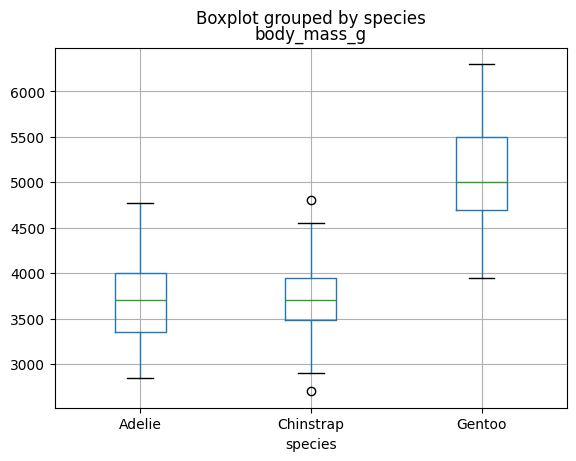

In [17]:
df.boxplot(
    column='body_mass_g',
    by='species'
)
plt.show()

#### Ejercicio 
Utiliza los tres tipos de gráficos que hemos analizado hasta ahora para analizar el resto de las variables

In [18]:
'tu código aquí'

'tu código aquí'

### Dispersión
Otro de los principales gráficos en el análisis de datos es el de dispersión, que muestra la relación entre dos principales variables.

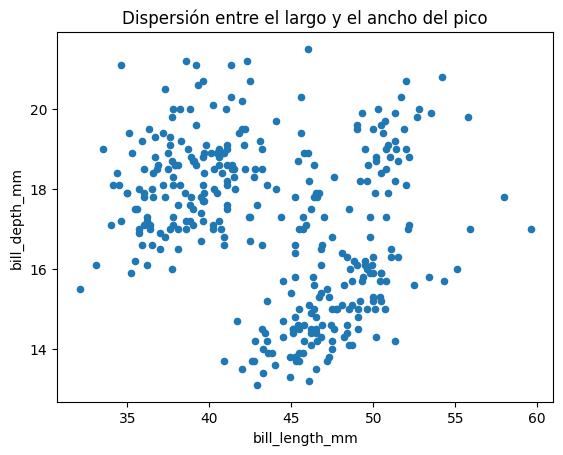

In [19]:
df.plot.scatter(
    x='bill_length_mm',
    y='bill_depth_mm',
)
plt.title('Dispersión entre el largo y el ancho del pico')
plt.show()

Si observas con atención, existen tres diferentes clusters o "conglomerados" podemos ver qué pasa si asignamos colore por especie.

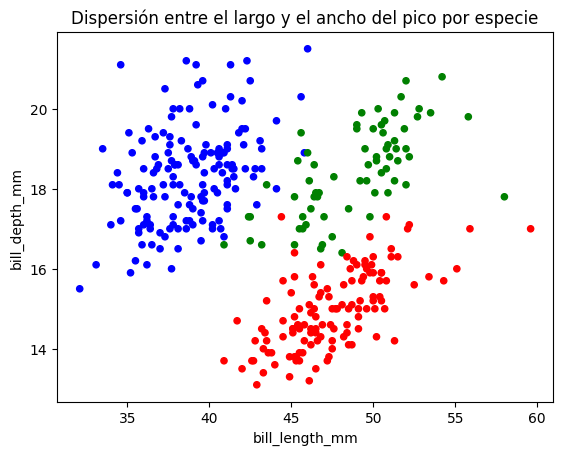

In [20]:
colors = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'red'}
df.plot.scatter(
    x='bill_length_mm',
    y='bill_depth_mm',
    c=df['species'].map(colors)
)
plt.title('Dispersión entre el largo y el ancho del pico por especie')
plt.show()

Los colores muestran que hay diferencias por especies, pero en el gráfico no tenemos claro qué especie es qué color, podemos agregarlo pero veremos luego cómo hacerlo.

### Ejercicio final
Utiliza lo aprendido y termina de analizar los datos y las diferentes asociaciones que creas que existan.

### Práctica personal
Abre otro dataset que conozcas y aplica lo que practicamos.
